Importing plotly failed. Interactive plots will not work.
16:17:31 - cmdstanpy - INFO - Chain [1] start processing
16:17:31 - cmdstanpy - INFO - Chain [1] done processing


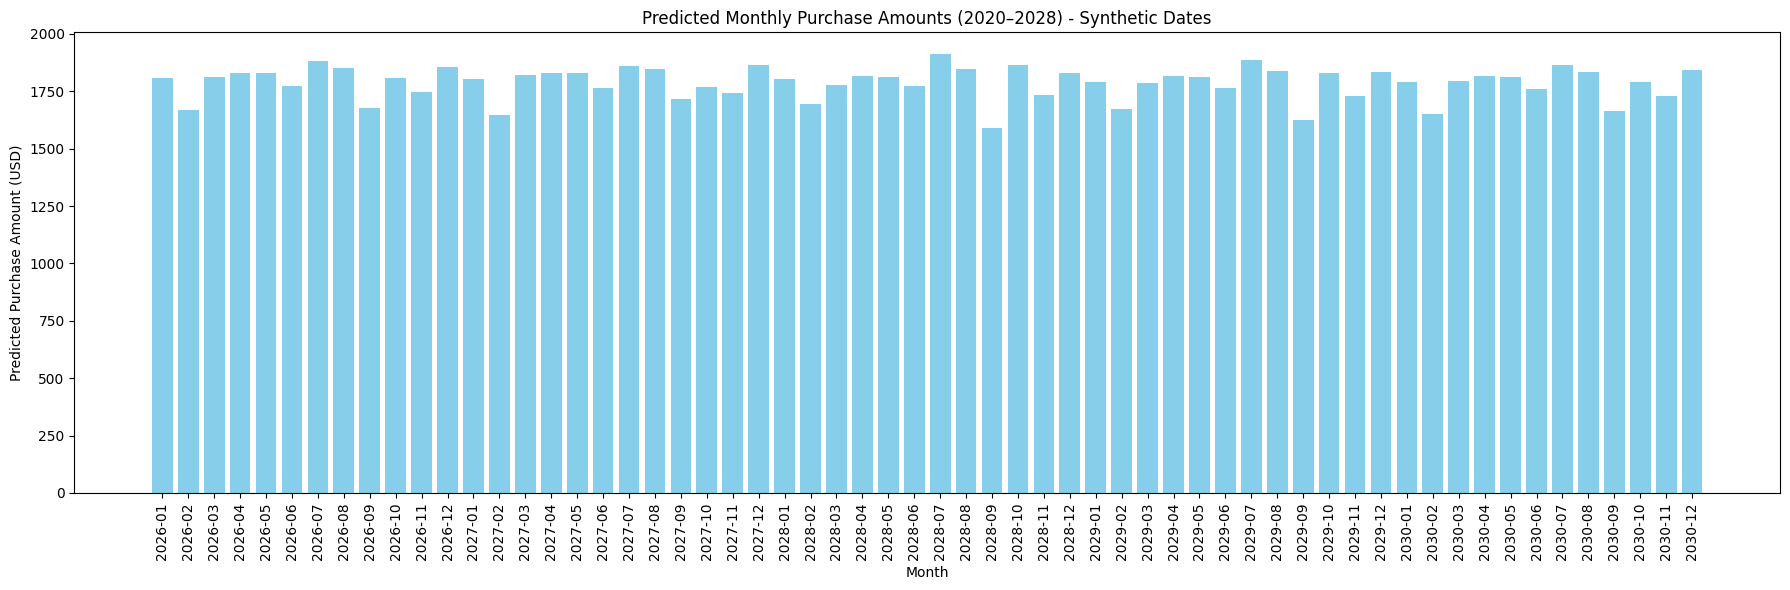

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("shopping_trends.csv")

df['Purchase Date'] = pd.date_range(start='2018-01-01', periods=len(df), freq='D')

monthly_sales = (
    df.groupby(pd.Grouper(key='Purchase Date', freq='ME'))['Purchase Amount (USD)']
    .sum()
    .reset_index()
)

prophet_df = monthly_sales.rename(columns={
    'Purchase Date': 'ds',
    'Purchase Amount (USD)': 'y'
})


m = Prophet()
m.fit(prophet_df)

future = m.make_future_dataframe(periods=60, freq='ME')

forecast = m.predict(future)

mask = (forecast['ds'] >= '2026-01-01') & (forecast['ds'] <= '2030-12-31')
forecast_filtered = forecast.loc[mask]

plt.figure(figsize=(18, 6))
plt.bar(forecast_filtered['ds'].dt.strftime('%Y-%m'), forecast_filtered['yhat'], color='skyblue')

plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Predicted Purchase Amount (USD)")
plt.title("Predicted Monthly Purchase Amounts (2020–2028) - Synthetic Dates")
plt.tight_layout()
plt.show()